In [1]:
# Import packages
import json

import requests
import pandas as pd
pd.options.display.max_columns = None

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ingest to df
resp = requests.get('https://pomber.github.io/covid19/timeseries.json')
resp_json_str = resp.text
resp_dict = json.loads(resp_json_str)
l = []
for c, cl in resp_dict.items():
    for d in cl:
        d.update({'country' : c})
        l.append(d)
df = pd.DataFrame(l)

# Filter, transform
ASEAN_COUNTRIES = ['Singapore', 'Thailand', 'Malaysia', 'Indonesia', 'Vietnam', 'Cambodia', 'Philippines', 'Brunei']
df = df[df.country.isin(ASEAN_COUNTRIES)]

In [3]:
# Filter & Transform
df_sg = df[df.country=='Singapore'].copy()
df_sg['date'] = pd.to_datetime(df_sg['date'], format='%Y-%m-%d')
df_sg['date'] = df_sg['date'].dt.strftime('%Y-%m-%d')
df_sg['date'] = df_sg['date'].astype(str)
# Feature: New cases
df_sg['confirmed_tm1'] = df_sg['confirmed'].shift(1)
df_sg['confirmed_tm1'] = df_sg['confirmed_tm1'].fillna(0)
df_sg['confirmed_tm1'] = df_sg['confirmed_tm1'].astype(int)
df_sg['new'] = df_sg['confirmed'] - df_sg['confirmed_tm1']
# Feature: Currently Hospitalised
df_sg['live'] = df_sg['confirmed'] - df_sg['recovered']
_ = df_sg.reset_index(drop=True, inplace=True)
display(df_sg[['date', 'new', 'confirmed', 'live', 'recovered']].sort_values('date', ascending=True).tail(30).T)

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
date,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17
new,2,4,3,0,1,0,4,0,2,2,0,0,9,4,2,2,0,7,13,8,12,0,10,18,0,22,12,14,17,23
confirmed,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266
live,53,52,50,50,48,48,38,38,38,31,31,31,30,34,30,32,32,39,52,60,72,72,82,82,82,103,107,121,134,152
recovered,24,29,34,34,37,37,51,51,53,62,62,62,72,72,78,78,78,78,78,78,78,78,78,96,96,97,105,105,109,114


In [4]:
# 2nd graph, used for highlighting DORSCON Orange
x = np.arange(df_sg.shape[0])
df2 = pd.DataFrame({'x' : x, 'y' : 0})

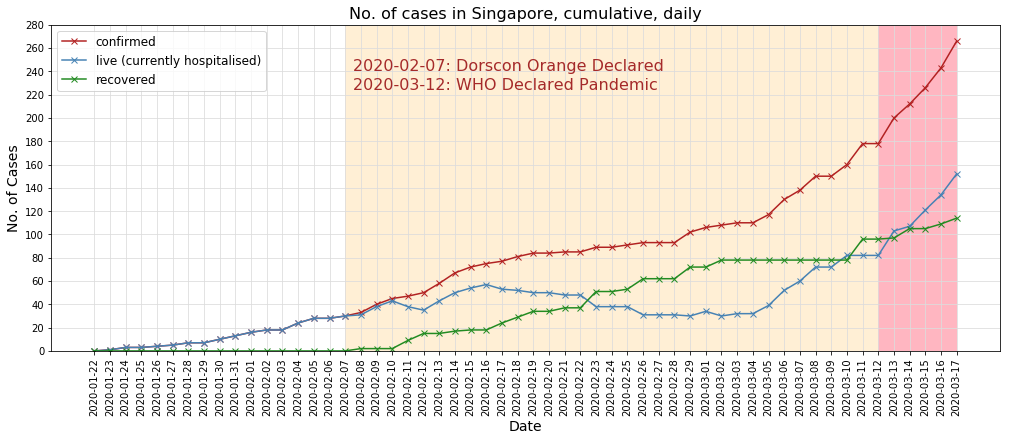

In [5]:
fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.plot(kind='line', x='date', y='confirmed', ax=ax, marker='x', color='FIREBRICK')
df_sg.plot(kind='line', x='date', y='live', ax=ax, marker='x', color='STEELBLUE')
df_sg.plot(kind='line', x='date', y='recovered', ax=ax, marker='x', color='FORESTGREEN')
df2.plot(kind='line', x='x', y='y', ax=ax, linewidth=0)

# x & y axes
ax.set_xticks(df_sg.index)
ax.set_xticklabels(df_sg['date'], rotation=90)
ax.set_xlabel("Date", fontsize=14)

ylim_max = df_sg['confirmed'].max()
ylim_max = (ylim_max//20 + 1)*20

ax.set_ylim(0, ylim_max)
ax.set_yticks(range(0,ylim_max+1,20))
ax.set_ylabel("No. of Cases", fontsize=14)
ax.grid(color='GAINSBORO')
ax.legend(['confirmed', 'live (currently hospitalised)', 'recovered'], fontsize=12)

# DORSCON Orange Colouring
do_index = df_sg[df_sg.date=='2020-02-07'].index[0]
ax.fill_between([do_index,x.max()], 0, ylim_max, facecolor='PAPAYAWHIP')
ax.text(do_index+0.5, ylim_max*0.86,"2020-02-07: Dorscon Orange Declared", fontsize=16, color="BROWN")

# WHO Declares Pandemic
pdm_index = df_sg[df_sg.date=='2020-03-12'].index[0]
ax.fill_between([pdm_index,x.max()], 0, ylim_max, facecolor='LIGHTPINK')
ax.text(do_index+0.5, ylim_max*0.80,"2020-03-12: WHO Declared Pandemic", fontsize=16, color="BROWN")

ax.set_title("No. of cases in Singapore, cumulative, daily", fontsize=16)
plt.show()

Sources: 

[Coronavirus outbreak: Singapore raises DORSCON level to Orange; schools to suspend inter-school, external activities](https://www.channelnewsasia.com/news/singapore/wuhan-coronavirus-dorscon-orange-singapore-risk-assessment-12405180)

[COVID-19 outbreak 'a pandemic': WHO chief](https://www.channelnewsasia.com/news/world/covid-19-coronavirus-pandemic-who-chief-12528328)